In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from functions import *

/Users/BadWizard/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [14]:
lihue_tmax = get_obs('USW00022536.dly', 'TMAX')
lihue_tmin = get_obs('USW00022536.dly', 'TMIN')

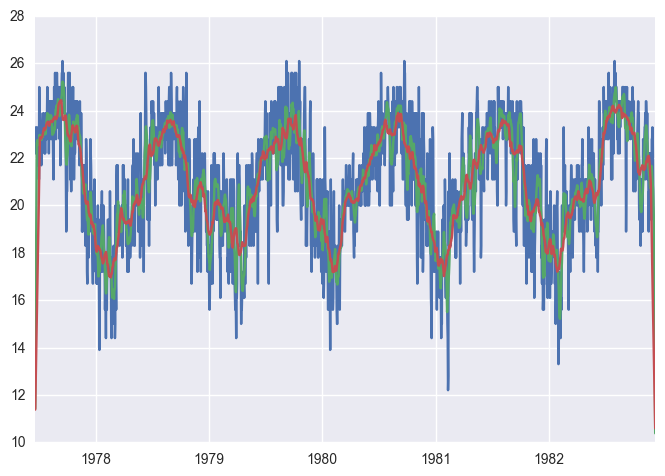

In [28]:
data1 = lihue_tmin[10000:12000]
plt.plot(data1['date'], data1['value'])
plot_smoothed(data1, win=10)
plot_smoothed(data1, win=30)

In [37]:
import urllib.request
datastations = ['USW00022536','USW00023188','USW00014922','RSM00030710']
for station in datastations:
    url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/gsn/{}.dly'.format(station)
    urllib.request.urlretrieve(url,'{}.dly'.format(station))

In [ ]:
stations = {}
for line in open('stations.txt','r'):
    if 'GSN' in line:
        fields = line.split()
    
        stations[fields[0]] = ' '.join(fields[4:])

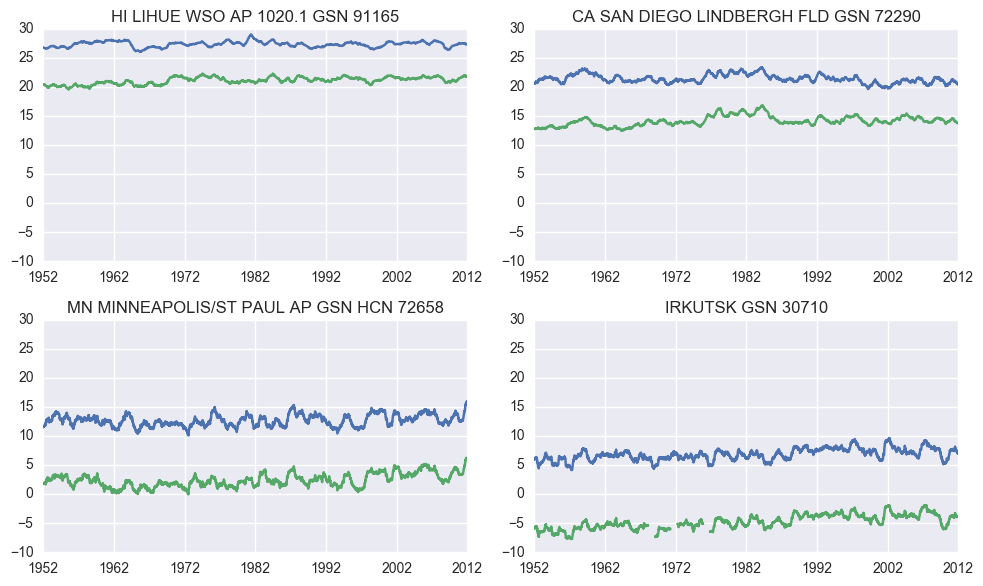

In [47]:
plt.figure(figsize=(10,6))
for (i, station) in enumerate(datastations):
    
    data1 = get_obs(fname='{}.dly'.format(station), obs='TMAX')
    data2 = get_obs(fname='{}.dly'.format(station), obs='TMIN')
    
    plt.subplot(2,2,i+1)
    plot_smoothed(data1, win=365)
    plot_smoothed(data2, win=365)
    
    plt.axis(xmin = np.datetime64('1952'), xmax=np.datetime64('2012'),
             ymin = -10, ymax = 30)
    plt.title('{}'.format(stations[station]))
    plt.tight_layout()